In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import patches
from sympy import *
from scipy.optimize import fsolve, fmin, root
from collections import Counter, defaultdict
init_printing(use_unicode=True)

In [2]:
r, c, u, v, E = symbols('r c u v E')

## Simple Case

$f = \dfrac{1}{2}rc^{2} - Ec$ with $r > 0$

$c = \dfrac{E}{r}$

In [2]:
def fsimple(r,c,E):
    return (1/2)*r*c**2-E*c

def csimple(E,r):
    return E/r

In [3]:
c = np.linspace(-5,5,1001)

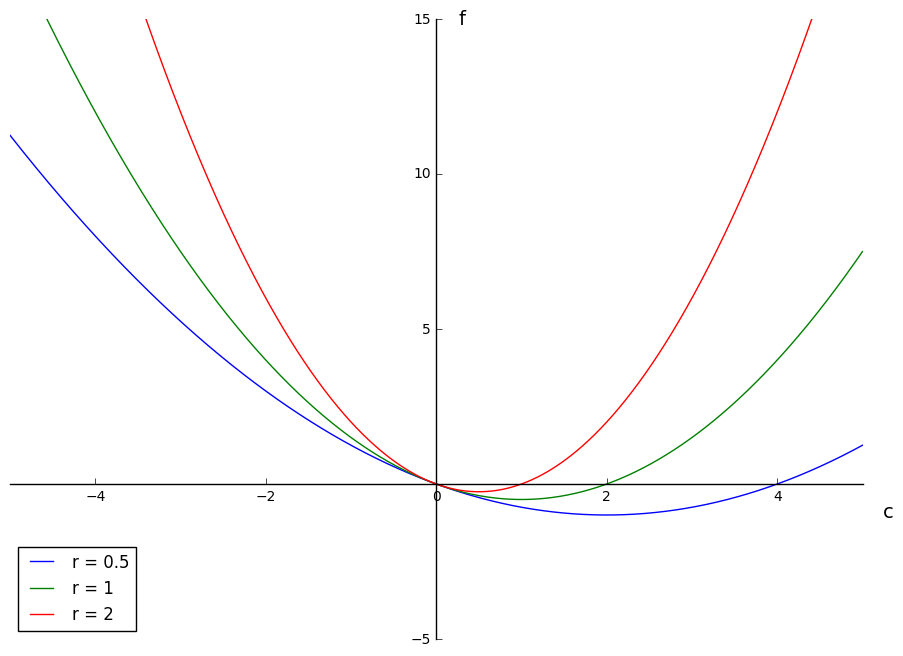

In [4]:
plt.figure(figsize=(11,8))
plt.gca().spines['left'].set_position('zero')
plt.gca().spines['bottom'].set_position('zero')
plt.gca().spines['right'].set_color('none')
plt.gca().spines['top'].set_color('none')
plt.gca().xaxis.set_ticks_position('bottom')
plt.gca().yaxis.set_ticks_position('left')
plt.xlim(-5,5), plt.ylim(-5,15)
plt.xlabel('c', fontsize=14)
plt.ylabel('f', rotation='horizontal',verticalalignment='center',  fontsize=14)
plt.gca().yaxis.set_label_coords(0.53,1)
plt.gca().xaxis.set_label_coords(1.03,0.22)
yticks1 = plt.gca().yaxis.get_major_ticks()
yticks1[1].label1.set_visible(False)
plt.plot(c,fsimple(0.5,c,1),label='r = 0.5')
plt.plot(c,fsimple(1,c,1),label='r = 1')
plt.plot(c,fsimple(2,c,1),label='r = 2')
plt.legend(loc='best');

In [5]:
E = np.linspace(0,5)

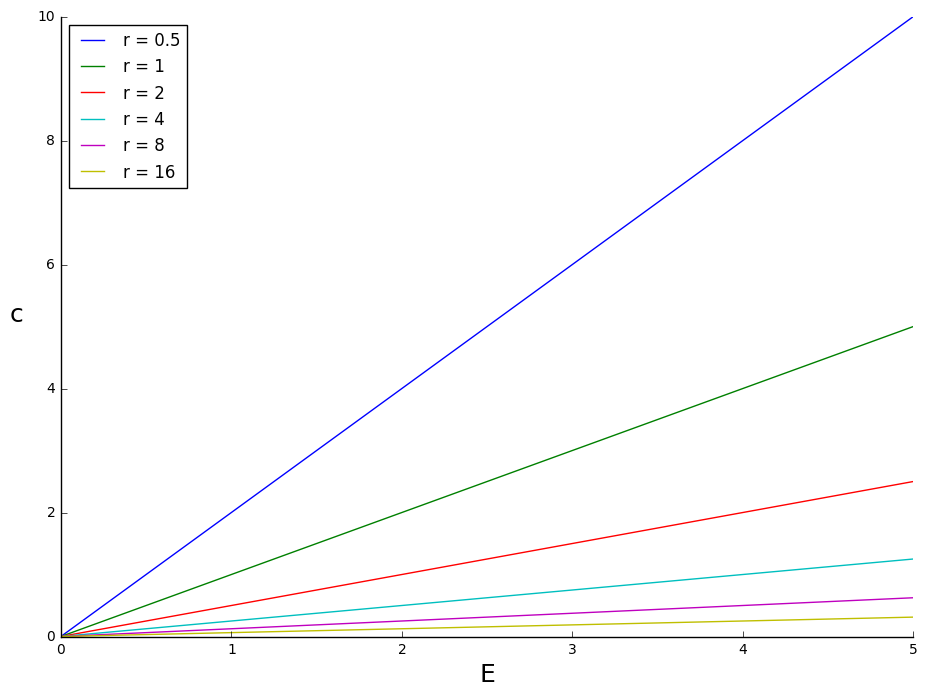

In [6]:
plt.figure(figsize=(11,8))
plt.plot(E,csimple(E,0.5),label='r = 0.5')
plt.plot(E,csimple(E,1),label='r = 1')
plt.plot(E,csimple(E,2),label='r = 2')
plt.plot(E,csimple(E,4),label='r = 4')
plt.plot(E,csimple(E,8),label='r = 8')
plt.plot(E,csimple(E,16),label='r = 16')
plt.gca().spines['right'].set_color('none')
plt.gca().spines['top'].set_color('none')
plt.gca().xaxis.set_ticks_position('bottom')
plt.gca().yaxis.set_ticks_position('left')
plt.ylabel('c',fontsize=18,rotation='horizontal',labelpad=15)
plt.xlabel('E',fontsize=18)
plt.legend(loc='best');

### Not so simple case

$f = \dfrac{1}{2}rc^{2} + \dfrac{1}{4}|u|c^{4} - Ec$

In [7]:
def f2(r,c,u,E):
    return (1/2)*r*c**2+(1/4)*u*c**4-E*c

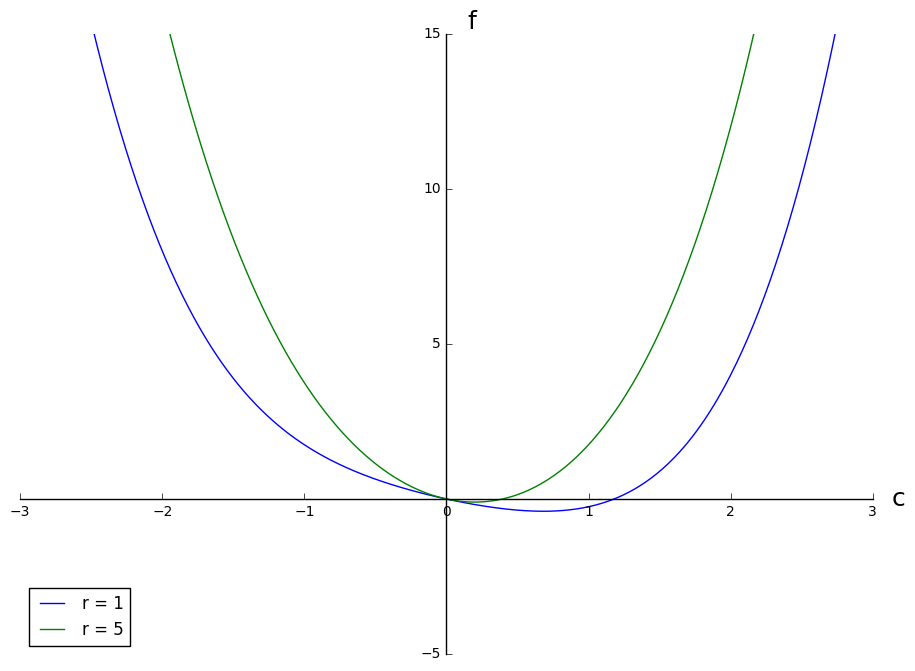

In [8]:
plt.figure(figsize=(11,8))
plt.xlabel('c',fontsize=18)
plt.ylabel('f',fontsize=18,rotation='horizontal',labelpad=15)
plt.xlim(-3,3), plt.ylim(-5,15)
plt.gca().spines['left'].set_position('zero')
plt.gca().spines['bottom'].set_position('zero')
plt.gca().spines['right'].set_color('none')
plt.gca().spines['top'].set_color('none')
plt.gca().xaxis.set_ticks_position('bottom')
plt.gca().yaxis.set_ticks_position('left')
plt.gca().yaxis.set_label_coords(0.53,1)
plt.gca().xaxis.set_label_coords(1.03,0.27)
yticks2 = plt.gca().yaxis.get_major_ticks()
yticks2[1].label1.set_visible(False)
plt.plot(c,f2(1,c,1,1),label='r = 1')
plt.plot(c,f2(5,c,1,1),label='r = 5')
plt.legend(loc='best');

In [9]:
def please(r,u,E):
    return ((np.sqrt(12*r**3*u**3+81*u**4*E**2)+9*u**2*E)/2)**(1/3)/(3**(2/3)*u) - (r*(2/3)**(1/3)/((np.sqrt(12*r**3*u**3+81*u**4*E**2)+9*u**2*E))**(1/3))

In [10]:
E2 = np.linspace(-1,5)

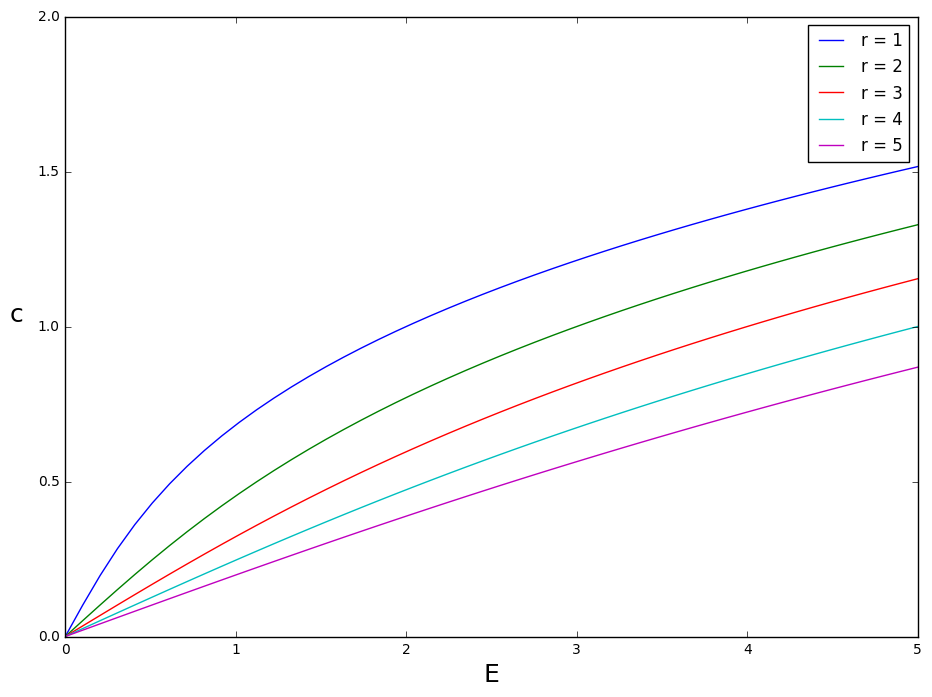

In [11]:
plt.figure(figsize=(11,8))
plt.xlim(0,5),plt.ylim(0,2)
plt.xlabel('E',fontsize=18)
plt.ylabel('c',fontsize=18,rotation='horizontal',labelpad=15)
plt.plot(E,please(1,1,E),label='r = 1')
plt.plot(E,please(2,1,E),label='r = 2')
plt.plot(E,please(3,1,E),label='r = 3')
plt.plot(E,please(4,1,E),label='r = 4')
plt.plot(E,please(5,1,E),label='r = 5')
plt.legend(loc='best');

In [12]:
def Eofc1(r,c,u):
    return r*c+u*c**3

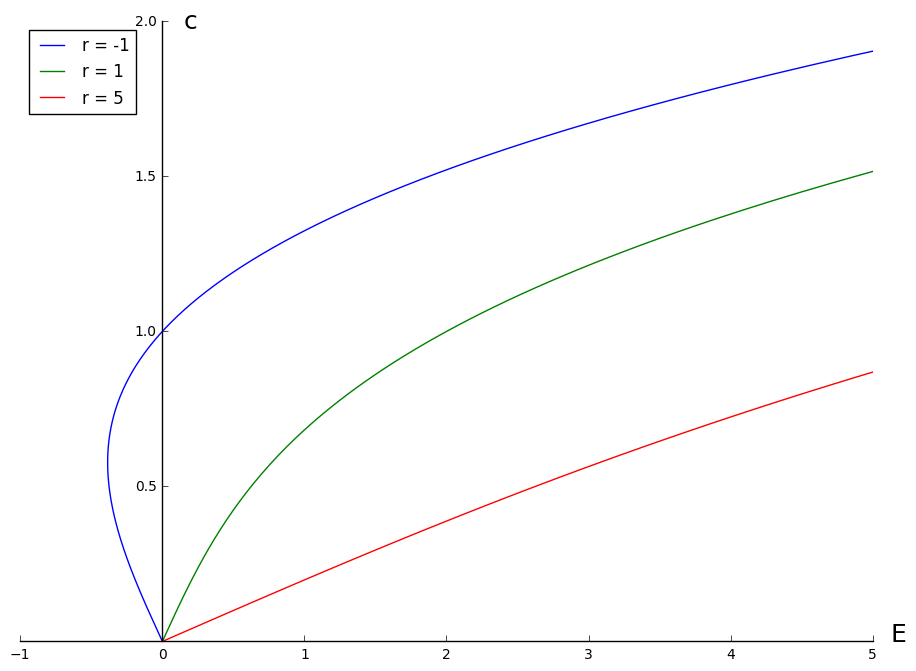

In [13]:
plt.figure(figsize=(11,8))
plt.xlim(-1,5),plt.ylim(0,2)
plt.gca().spines['left'].set_position('zero')
plt.gca().spines['bottom'].set_position('zero')
plt.gca().spines['right'].set_color('none')
plt.gca().spines['top'].set_color('none')
plt.gca().xaxis.set_ticks_position('bottom')
plt.gca().yaxis.set_ticks_position('left')
plt.xlim(-1,5), plt.ylim(0,2)
plt.xlabel('E', fontsize=18)
plt.ylabel('c', rotation='horizontal',verticalalignment='center',  fontsize=18)
plt.gca().yaxis.set_label_coords(0.2,1)
plt.gca().xaxis.set_label_coords(1.03,0.03)
yticks3 = plt.gca().yaxis.get_major_ticks()
yticks3[0].label1.set_visible(False)
plt.plot(Eofc1(-1,c,1),c,label='r = -1')
plt.plot(Eofc1(1,c,1),c,label='r = 1')
plt.plot(Eofc1(5,c,1),c,label='r = 5')
plt.legend(loc='best');

### Even less simple

$f = \dfrac{1}{2}rc^{2} - \dfrac{1}{4}|u|c^{4} + \dfrac{1}{6}|v|c^{6} - Ec$

In [14]:
def f3(c,r,u,v,E):
    return (1/2)*r*c**2-(1/4)*abs(u)*c**4+(1/6)*abs(v)*c**6-E*c

def df3(c,r,u,v,E):
    return r*c+u*c**3+v*c**5-E

In [16]:
f = (1/2)*r*c**2+(1/4)*u*c**4+(1/6)*v*c**6-E*c
f

ValueError: operands could not be broadcast together with shapes (50,) (1001,) 

In [ ]:
E_c = expand(solve(f.diff(c),E)[0])
E_c

/opt/conda/lib/python3.5/site-packages/matplotlib/axes/_axes.py:531: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


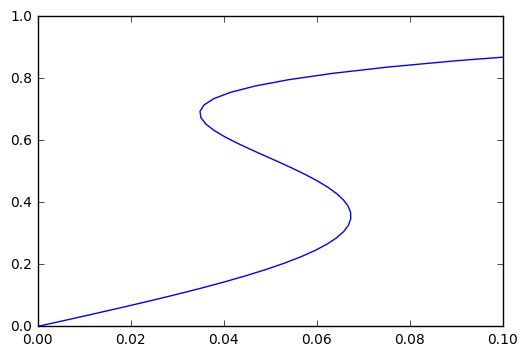

In [15]:
plt.plot(df3(np.linspace(0,1),0.3,-1,1,0),np.linspace(0,1))
# plt.scatter(Eu(0.3,-1,1),0.35608274213,c='g',label='$E_U,\ c_L$')
# plt.scatter(El(0.3,-1,1),0.687899033839,c='r',label='$E_L,\ c_U$')
plt.xlim(0,0.1),plt.ylim(0,1)
plt.legend(fontsize=16);

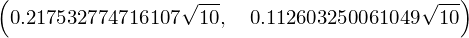

In [58]:
simplify(c_U.subs([(r,0.3),(u,-1),(v,1)])),simplify(c_L.subs([(r,0.3),(u,-1),(v,1)]))

In [59]:
0.217532774716107*np.sqrt(10),0.112603250061049*np.sqrt(10)

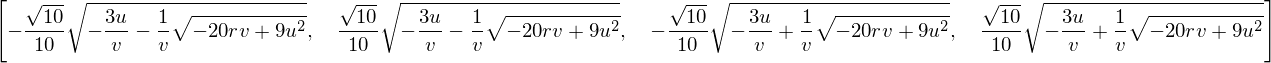

In [7]:
solve(simplify(E_c.diff(c)),c)

In [57]:
c_L = solve(simplify(E_c.diff(c)),c)[1]
c_U = solve(simplify(E_c.diff(c)),c)[3]

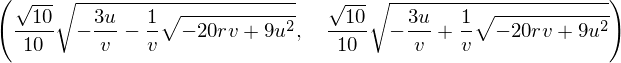

In [7]:
c_L,c_U

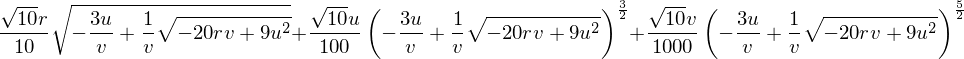

In [40]:
E_c.subs(c,c_U)

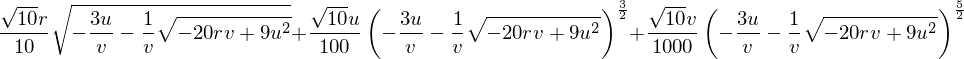

In [43]:
E_c.subs(c,c_L)

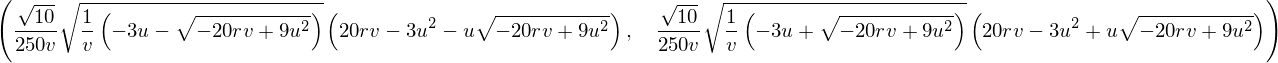

In [13]:
E_U = simplify(E_c.subs(c,c_L))
E_L = simplify(E_c.subs(c,c_U))
E_U,E_L

In [16]:
r = np.linspace(0,0.5)

In [17]:
def E_U(r,u,v):
    return (np.sqrt(10*v*(-3*u-np.sqrt(9*u**2-20*r*v)))*(20*r*v-3*u**2-u*np.sqrt(9*u**2-20*r*v))/(250*v**2))

def E_L(r,u,v):
    return (np.sqrt(10*v*(-3*u+np.sqrt(9*u**2-20*r*v)))*(20*r*v-3*u**2+u*np.sqrt(9*u**2-20*r*v))/(250*v**2))

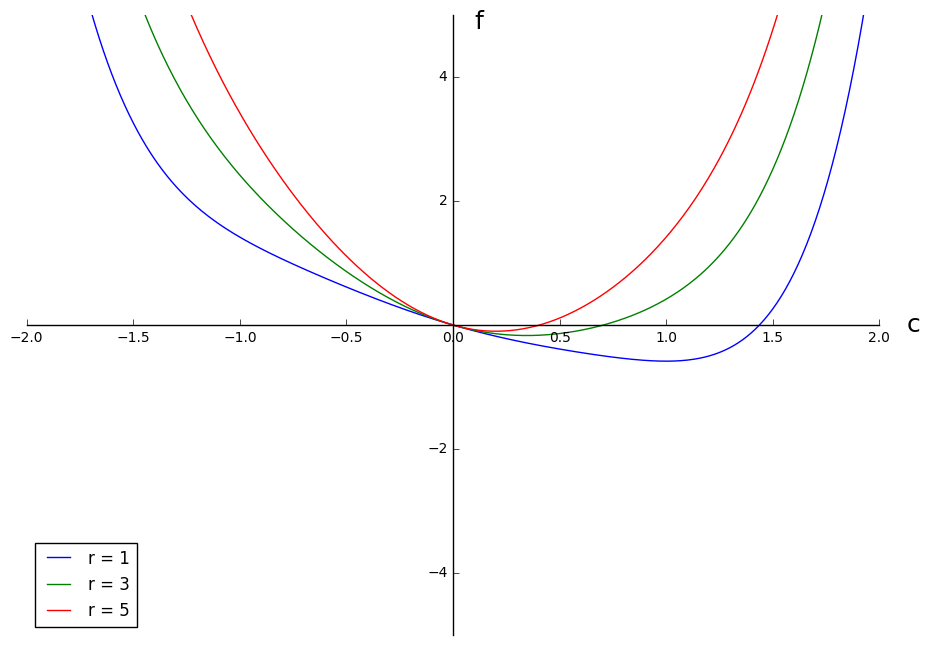

In [18]:
plt.figure(figsize=(11,8))
plt.xlabel('c',fontsize=18)
plt.ylabel('f',fontsize=18,rotation='horizontal',labelpad=15)
plt.xlim(-2,2), plt.ylim(-5,5)
plt.gca().spines['left'].set_position('zero')
plt.gca().spines['bottom'].set_position('zero')
plt.gca().spines['right'].set_color('none')
plt.gca().spines['top'].set_color('none')
plt.gca().xaxis.set_ticks_position('bottom')
plt.gca().yaxis.set_ticks_position('left')
plt.gca().yaxis.set_label_coords(0.53,0.97)
plt.gca().xaxis.set_label_coords(1.04,0.52)
yticks4 = plt.gca().yaxis.get_major_ticks()
yticks4[3].label1.set_visible(False)
plt.plot(c,f3(c,1,1,1,1),label='r = 1')
plt.plot(c,f3(c,3,1,1,1),label='r = 3')
plt.plot(c,f3(c,5,1,1,1),label='r = 5')
plt.legend(loc='best');

In [19]:
def Eofc2(r,c,u,v):
    return r*c-u*c**3+v*c**5

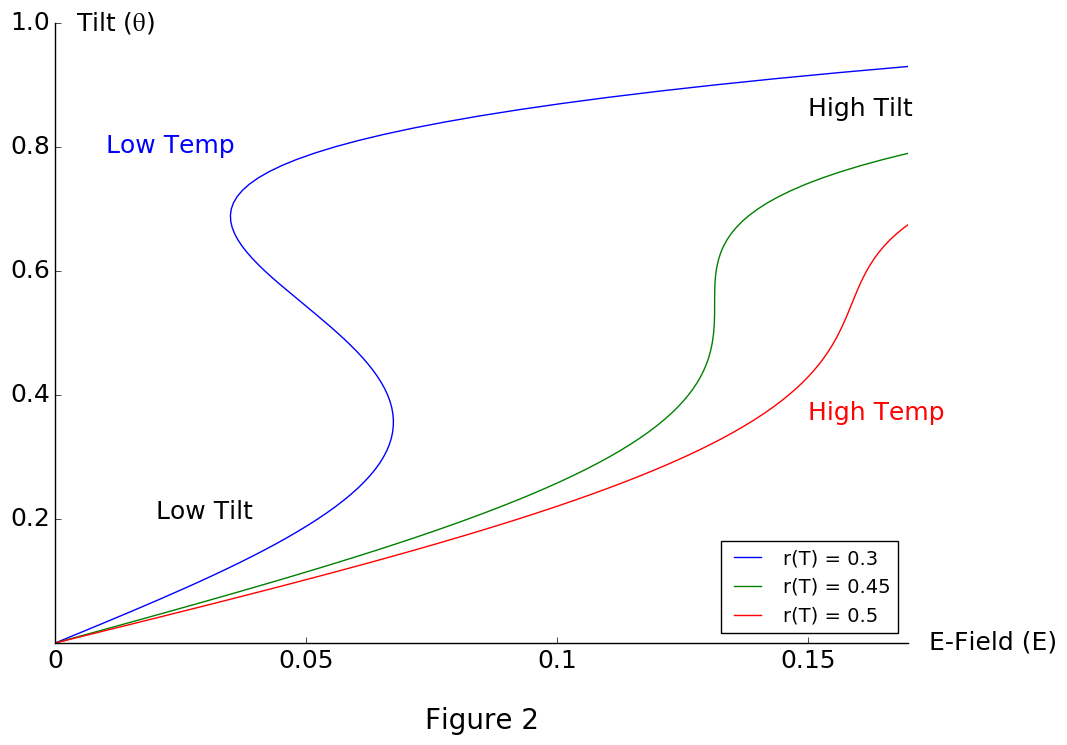

In [44]:
plt.figure(figsize=(11,8))
plt.gca().spines['left'].set_position('zero')
plt.gca().spines['bottom'].set_position('zero')
plt.gca().spines['right'].set_color('none')
plt.gca().spines['top'].set_color('none')
plt.gca().xaxis.set_ticks_position('bottom')
plt.gca().yaxis.set_ticks_position('left')
plt.xlim(0,0.17), plt.ylim(0,1)
plt.yticks([0,0.2,0.4,0.6,0.8,1.0],('0','0.2','0.4','0.6','0.8','1.0'),fontsize=18)
plt.xticks([0,0.05,0.1,0.15],('0','0.05','0.1','0.15'),fontsize=18)
plt.xlabel('E-Field (E)', fontsize=18)
plt.ylabel('Tilt ($\mathregular{\\theta}$)', rotation='horizontal',verticalalignment='center', fontsize=18)
plt.title('Figure 2',y=-0.15,fontsize=20)
plt.gca().text(0.15, 0.85, 'High Tilt', fontsize=18)
plt.text(0.01, 0.79, 'Low Temp', fontsize=18,color='blue')
plt.text(0.15, 0.36, 'High Temp', fontsize=18,color='red')
plt.gca().text(0.02, 0.2, 'Low Tilt', fontsize=18)
plt.gca().yaxis.set_label_coords(0.07,1)
plt.gca().xaxis.set_label_coords(1.1,0.02)
yticks5 = plt.gca().yaxis.get_major_ticks()
yticks5[0].label1.set_visible(False)
# plt.plot(Eofc2(0.15,c,1,1),c,label='r(T) = 0.15')
# plt.plot(Eofc2(0.2,c,1,1),c,label='r(T) = 0.2')
plt.plot(Eofc2(0.3,c,1,1),c,label='r(T) = 0.3')
# plt.plot([0.13145,0.13145],[0,1],'--k')
# plt.plot(Eofc2(0.4,c,1,1),c,label='r(T) = 0.4')
plt.plot(Eofc2(0.45,c,1,1),c,label='r(T) = 0.45')
plt.plot(Eofc2(0.5,c,1,1),c,label='r(T) = 0.5')
plt.legend(loc='lower right',fontsize=14);

In [45]:
s = np.linspace(0,0.5,101)

In [46]:
r3 = 3/16
Ec = np.sqrt(3/10)*(6/25)
r_T, E_T = [],[]
u=-1
v=1
n = 100
for i in np.linspace(0,Ec,n): #E
    for j in np.linspace(r3,9/20,n): #r
        if (E_L(j,u,v) < i) and (i < E_U(j,u,v)):
            c1 = fsolve(df3,np.array([0,1]),args=(j,u,v,i))
            
            f1 = f3(c1[0],j,u,v,i)
            f2 = f3(c1[1],j,u,v,i)
            
            if f1 <= f2:
                r_T.append(j)
                E_T.append(i)
                r3 = j
                break

/opt/conda/lib/python3.5/site-packages/ipykernel/__main__.py:2: RuntimeWarning: invalid value encountered in sqrt
  from ipykernel import kernelapp as app
/opt/conda/lib/python3.5/site-packages/ipykernel/__main__.py:5: RuntimeWarning: invalid value encountered in sqrt


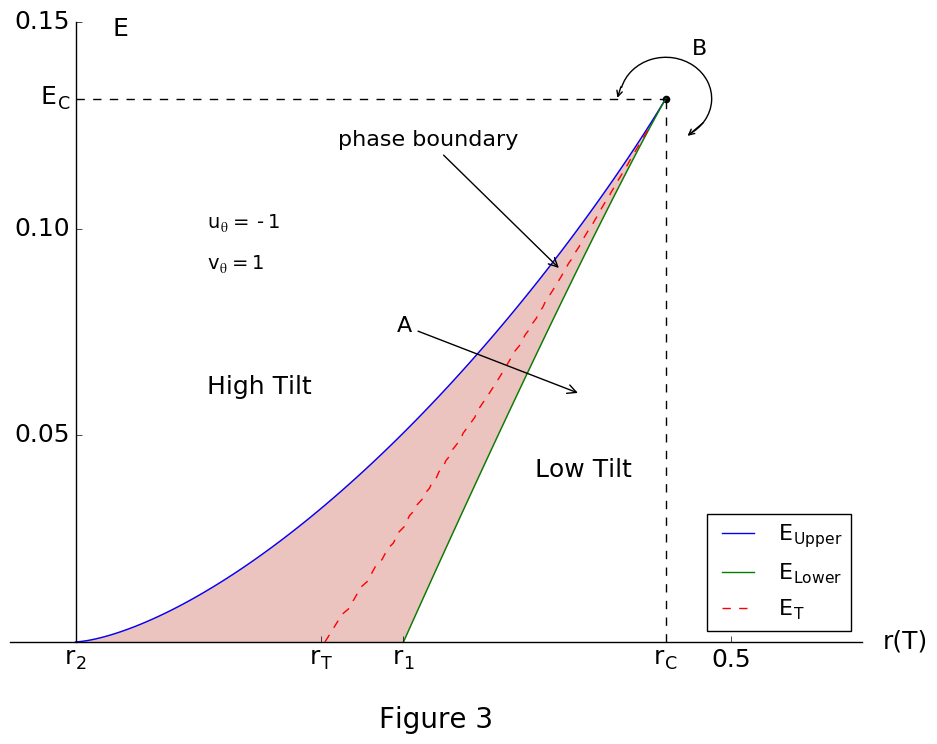

In [48]:
plt.figure(figsize=(11,8))
plt.plot(s,E_U(s,u,v),label='$\mathregular{E_{Upper}}$')
plt.plot(s,E_L(s,u,v),label='$\mathregular{E_{Lower}}$')
plt.fill_between(s,E_U(s,u,v),E_L(s,u,v), color='#D98880',alpha='0.5')
plt.plot(r_T,E_T,'--r',label='$\mathregular{E_{T}}$')
plt.scatter(0.45,E_L(s,-1,1)[90],c='k')
plt.plot([0,0.45],[E_L(s,-1,1)[90],E_L(s,-1,1)[90]],'--k')
plt.plot([0.45,0.45],[0,E_L(s,-1,1)[90]],'--k')
plt.gca().spines['left'].set_position('zero')
plt.gca().spines['bottom'].set_position('zero')
plt.gca().spines['right'].set_color('none')
plt.gca().spines['top'].set_color('none')
plt.gca().xaxis.set_ticks_position('bottom')
plt.gca().yaxis.set_ticks_position('left')
yticks6 = plt.gca().yaxis.get_major_ticks()
plt.title('Figure 3',y=-0.15,fontsize=20)
yticks6[0].label1.set_visible(False)
plt.gca().yaxis.set_label_coords(0.13,0.97)
plt.gca().xaxis.set_label_coords(1.05,0.02)
plt.xticks([0,0.1875,0.25,0.45,0.5],('$\mathregular{r_{2}}$','$\mathregular{r_{T}}$','$\mathregular{r_{1}}$','$\mathregular{r_{C}}$','0.5'),fontsize=18)
plt.yticks([0,0.05,0.10,0.13145,0.15,0.20],('0','0.05','0.10','$\mathregular{E_{C}}$','0.15','0.20'),fontsize=18)
plt.gca().annotate('phase boundary', xy=(0.37,0.09), xytext=(0.2, 0.12),arrowprops=dict(arrowstyle="->",facecolor='black'),fontsize=16)
plt.gca().text(0.1, 0.06, 'High Tilt', fontsize=18)
plt.gca().text(0.35, 0.04, 'Low Tilt', fontsize=18)
plt.gca().text(0.47, 0.142, 'B', fontsize=16)
plt.gca().text(0.1, 0.1, '$\mathregular{u_{\\theta} = -1}$', fontsize=14)
plt.gca().text(0.1, 0.09, '$\mathregular{v_{\\theta} = 1}$', fontsize=14)
plt.gca().annotate("A", xy=(0.385, 0.06), xytext=(0.245, 0.075), arrowprops=dict(arrowstyle="->",connectionstyle='arc3'),fontsize=16)
plt.gca().annotate("", xy=(0.4125,0.131), xytext=(0.4165,0.135),arrowprops=dict(arrowstyle="->",connectionstyle='arc3'))
plt.gca().annotate("", xy=(0.465,0.122), xytext=(0.48,0.126),arrowprops=dict(arrowstyle="->",connectionstyle='arc3'))
e1 = patches.Arc((0.45, 0.13145), 0.07, 0.02, angle=0, theta1=-60, theta2=165, linewidth=1, fill=False, zorder=2)
plt.gca().add_patch(e1)
plt.xlabel('r(T)',fontsize=18)
plt.ylabel('E',fontsize=18,rotation='horizontal')
plt.ylim(0,0.15),plt.xlim(-0.05,0.6)
plt.legend(loc='lower right',fontsize=16);

### $r_{1} = 0.25$

### $r_{2} = 0$

### $r_{C} = 0.45$

### $r_{C} = 0.1875$

### $E_{C} = 0.13145$

In [23]:
Elower(0.45,-1,1),Eupper(0.45,-1,1)

(0.13145341380123987, 0.13145341380123987)

In [24]:
for i in range(s.shape[0]):
    if Elower(s,-1,1)[i]==Eupper(s,-1,1)[i]:
        print(i,s[i])

90 0.45


/usr/local/lib/python3.4/dist-packages/IPython/kernel/__main__.py:9: RuntimeWarning: invalid value encountered in sqrt
/usr/local/lib/python3.4/dist-packages/IPython/kernel/__main__.py:4: RuntimeWarning: invalid value encountered in sqrt


In [25]:
for i in range(s.shape[0]):
    if Eupper(s,-1,1)[i]==0:
        print(i,s[i])

50 0.25


/usr/local/lib/python3.4/dist-packages/IPython/kernel/__main__.py:4: RuntimeWarning: invalid value encountered in sqrt
